In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [43]:
df=pd.read_csv('personality_datasert.csv')

In [44]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [45]:
df.isnull().mean() * 100

Time_spent_Alone             0.0
Stage_fear                   0.0
Social_event_attendance      0.0
Going_outside                0.0
Drained_after_socializing    0.0
Friends_circle_size          0.0
Post_frequency               0.0
Personality                  0.0
dtype: float64

In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [47]:
np.array(df.columns.to_list())

array(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing',
       'Friends_circle_size', 'Post_frequency', 'Personality'],
      dtype='<U25')

In [48]:
df['Personality'].value_counts(dropna = False)

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

In [49]:
numeric_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
categorical_columns = ['Stage_fear', 'Drained_after_socializing']
target_column = 'Personality'

# Verify categorical values
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts(dropna=False))


Unique values in Stage_fear:
Stage_fear
No     1490
Yes    1410
Name: count, dtype: int64

Unique values in Drained_after_socializing:
Drained_after_socializing
No     1493
Yes    1407
Name: count, dtype: int64


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

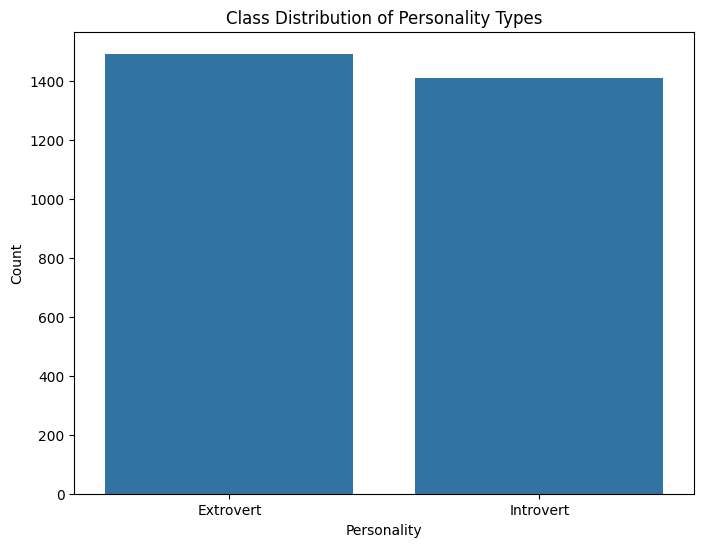

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(x=target_column, data=df)
plt.title('Class Distribution of Personality Types')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.show()


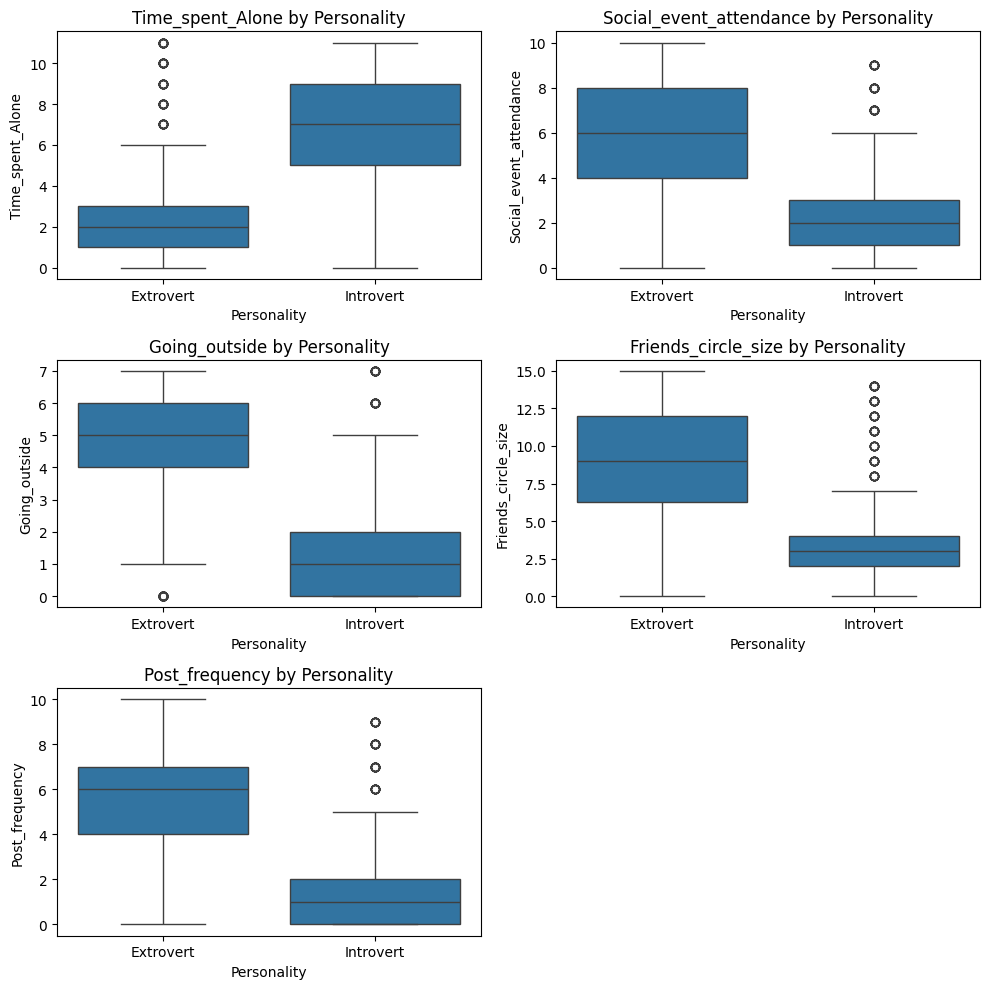

In [54]:
plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(x=target_column , y = df['Time_spent_Alone'] , data = df)
plt.title('Time_spent_Alone by Personality')

plt.subplot(3,2,2)
sns.boxplot(x=target_column , y = df['Social_event_attendance'], data = df)
plt.title('Social_event_attendance by Personality')

plt.subplot(3,2,3)
sns.boxplot(x=target_column , y = df['Going_outside'], data = df)
plt.title('Going_outside by Personality')

plt.subplot(3,2,4)
sns.boxplot(x=target_column , y = df['Friends_circle_size'], data = df)
plt.title('Friends_circle_size by Personality')

plt.subplot(3,2,5)
sns.boxplot(x=target_column , y = df['Post_frequency'], data = df)
plt.title('Post_frequency by Personality')

plt.tight_layout()

plt.show()

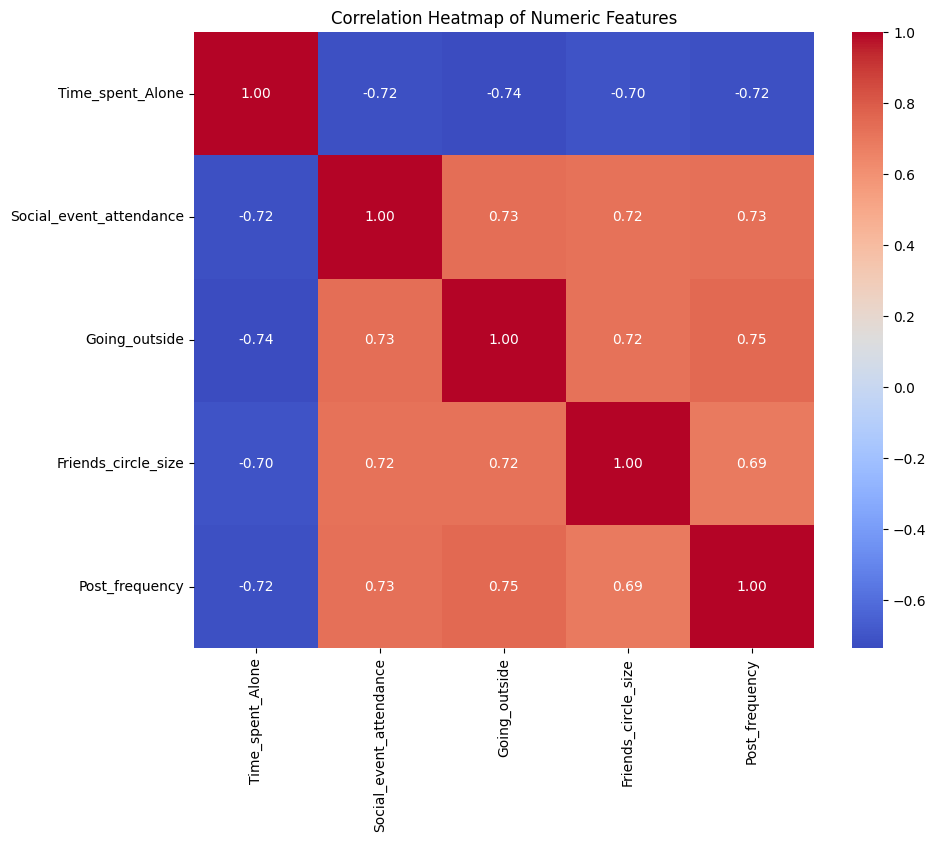

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [57]:
X = df[numeric_columns + categorical_columns]
y = df['Personality']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
numeric_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', StandardScaler())
])

In [63]:
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

In [64]:
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, categorical_columns)
])

In [75]:
from sklearn.ensemble import RandomForestClassifier

clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
clf_pipeline.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [76]:
y_pred = clf_pipeline.predict(X_test)

In [77]:
difference = np.sum(y_pred != y_test)
difference

np.int64(45)

In [78]:
from sklearn.metrics import accuracy_score

print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)

Test Accuracy: 92.24137931034483


In [80]:
y_pred = clf_pipeline.predict(X_test)
print(np.unique(y_pred, return_counts=True))


(array(['Extrovert', 'Introvert'], dtype=object), array([297, 283]))


In [81]:
import joblib

In [82]:
joblib.dump(clf_pipeline, 'clf_pipeline_model.pkl')


['clf_pipeline_model.pkl']